In [2]:
from influxdb import InfluxDBClient
from influxdb import DataFrameClient
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

In [3]:
client = InfluxDBClient('192.168.100.155',8086,'schmuddel','schmuddel','schmuddel')
query = 'SELECT mean("pressure") AS "mean_pressure", mean("flow") AS "mean_flow"  FROM "schmuddel"."autogen"."schmuddel" WHERE time > now()-1d GROUP BY time(5s) fill(previous)'

In [4]:
res_points = list(client.query(query).get_points())
df = pd.DataFrame(res_points)

In [5]:
diffflow = df.mean_flow.diff()
df['diffflow']= diffflow


In [6]:
#dfa =df.filter(items=[ 'mean_pressure', 'mean_flow'])
fig = px.line(df, x='time', y=["mean_flow","mean_pressure"])
fig.update_xaxes(rangeslider_visible=True)
fig.show()
# px.line(data_frame=dfa)


In [7]:
px.scatter(df, x="mean_pressure", y="mean_flow")

<AxesSubplot:xlabel='mean_pressure', ylabel='mean_flow'>

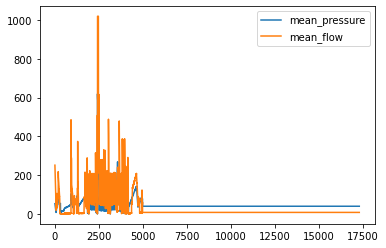

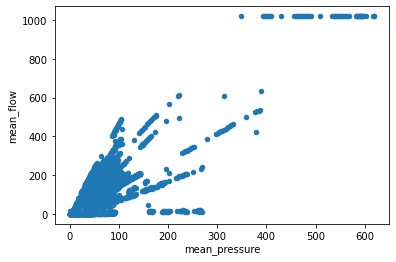

In [10]:
df.plot()
df.plot(x="mean_pressure", y="mean_flow",kind='scatter')  

In [1]:
dff =df.filter(items=[ 'time','mean_pressure', 'mean_flow'])
dff.fillna(0)

NameError: name 'df' is not defined

In [74]:
dff.dtypes

likes             object
mean_flow        float64
mean_pressure    float64
dtype: object

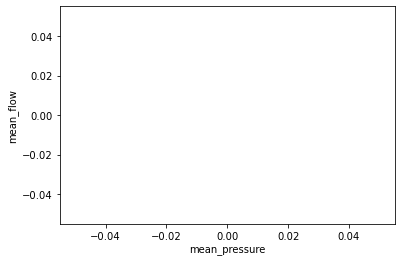

In [73]:
ax = dff.plot.scatter(x="mean_pressure", y="mean_flow",c="likes", colormap='viridis')

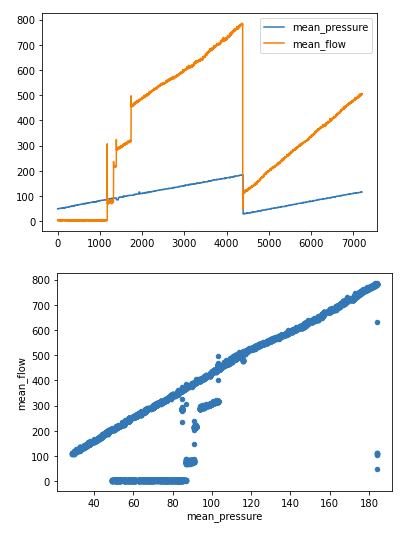
some randomness: flow is sometime rising linear with pressure